In [68]:
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans, MiniBatchKMeans

import pandas as pd
import numpy

In [22]:
#FOR EACH STATEMENT, TF-IDF VALUES ARE FOUND AND PLOTTED TO A 7X13 DATAFRAME.

example = ['Machine learning is super fun', 
           'Python is super, super cool',
           'Statistics is cool, too',
           'Data Science is fun',
           'Python is great for machine learning',
           'I like football', 'Football is great to watch']

#INSTEAD OF USING A TF-IDF PARAMETER, COUNT CAN ALSO BE USED BUT IT LEADS TO LESSER ACCURACY. 
vectorizer = TfidfVectorizer(min_df=1, stop_words='english')
dtm = vectorizer.fit_transform(example)
pd.DataFrame(dtm.toarray(), index=example, columns=
             vectorizer.get_feature_names()).head(10)

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
Machine learning is super fun,0.000000,0.000000,0.000000,0.500000,0.000000,0.5,0.000000,0.5,0.000000,0.000000,0.000000,0.500000,0.000000
"Python is super, super cool",0.408248,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.408248,0.000000,0.000000,0.816497,0.000000
"Statistics is cool, too",0.638709,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.769449,0.000000,0.000000
Data Science is fun,0.000000,0.609819,0.000000,0.506202,0.000000,0.0,0.000000,0.0,0.000000,0.609819,0.000000,0.000000,0.000000
Python is great for machine learning,0.000000,0.000000,0.000000,0.000000,0.500000,0.5,0.000000,0.5,0.500000,0.000000,0.000000,0.000000,0.000000
I like football,0.000000,0.000000,0.638709,0.000000,0.000000,0.0,0.769449,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Football is great to watch,0.000000,0.000000,0.538281,0.000000,0.538281,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.648465


In [23]:
#USING SINGLE VALUE DECOMPOSITION, DIMENSIONS ARE REDUCED FROM 13 TO 2.

lsa = TruncatedSVD(2, algorithm='arpack')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
pd.DataFrame(lsa.components_, index=["component_1",
        "component_2"], columns = vectorizer.get_feature_names())

,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
component_1,0.211903,0.082524,0.123490,0.293206,0.283966,0.425531,0.048611,0.425531,0.343490,0.082524,0.083414,0.510029,0.100157
component_2,-0.175362,-0.061554,0.654756,-0.124878,0.365768,-0.019431,0.413619,-0.019431,-0.029054,-0.061554,-0.110779,-0.240595,0.375162


In [14]:
#OUR FINAL DATAFRAME, AFTER SVD, HAS A 7X2 DIMENSION INSTEAD OF 7X13.

xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]

pd.DataFrame(dtm_lsa, index=example, columns=["component_1",
        "component_2"])

,component_1,component_2
Machine learning is super fun,0.957024,-0.290007
"Python is super, super cool",0.856484,0.516174
"Statistics is cool, too",0.563355,0.826215
Data Science is fun,0.704171,-0.710030
Python is great for machine learning,0.717284,-0.696781
I like football,0.099136,-0.995074
Football is great to watch,0.235618,-0.971846


In [25]:
#USING COSINE SIMILARITY MEASURE, THE SIMILARITY OF EACH STATEMENT TO EVERY OTHER STATEMENT IS FOUND, GIVING US A 13X13 DATAFRAME.

similarity = numpy.asarray(numpy.asmatrix(dtm_lsa)*numpy.
                       asmatrix(dtm_lsa).T)
pd.DataFrame(similarity, index=example, columns=example)

,Machine learning is super fun,"Python is super, super cool","Statistics is cool, too",Data Science is fun,Python is great for machine learning,I like football,Football is great to watch
Machine learning is super fun,1.000000,0.985458,0.857746,0.964535,0.905386,-0.083026,0.104459
"Python is super, super cool",0.985458,1.000000,0.932623,0.995359,0.820075,-0.251150,-0.066049
"Statistics is cool, too",0.857746,0.932623,1.000000,0.963019,0.558322,-0.583514,-0.421662
Data Science is fun,0.964535,0.995359,0.963019,1.000000,0.761204,-0.343126,-0.161758
Python is great for machine learning,0.905386,0.820075,0.558322,0.761204,1.000000,0.347952,0.516841
I like football,-0.083026,-0.251150,-0.583514,-0.343126,0.347952,1.000000,0.982423
Football is great to watch,0.104459,-0.066049,-0.421662,-0.161758,0.516841,0.982423,1.000000


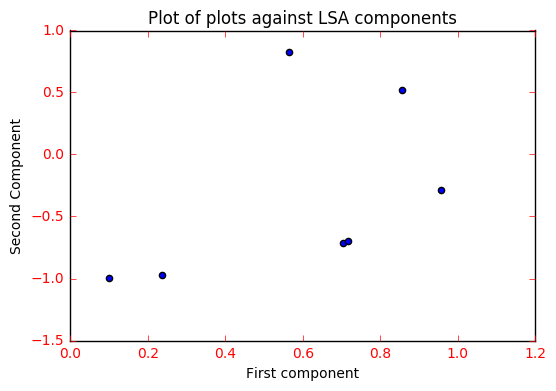

In [72]:
#%pylab inline
import matplotlib.pyplot as plt

with plt.rc_context({'xtick.color':'red', 'ytick.color':'red', 'figure.facecolor':'white'}):
    figure()
    plt.scatter(xs, ys)
    xlabel('First component')
    ylabel('Second Component')
    title('Plot of plots against LSA components')
show()

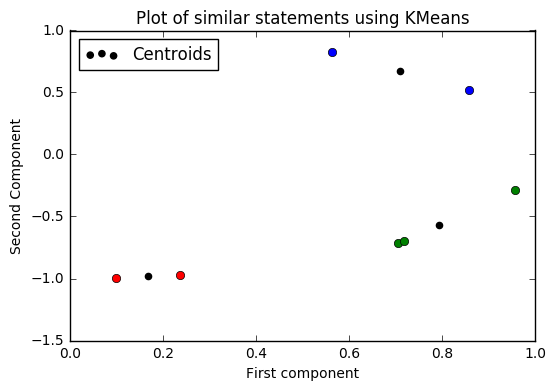

In [71]:
#FINALLY, KMEANS CLUSTERING IS USED TO FIND OUT WHICH STATEMENTS ARE SEMANTICALLY EQUIVALENT OR SIMILAR.

from matplotlib import pyplot
data = []

for i in range(0, len(xs)):
    data.append(np.array([xs[i],ys[i]]))

k = 3

#MiniBatchKMeans CAN ALSO BE USED IN PLACE OF KMEANS.
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


with plt.rc_context({'figure.facecolor':'white'}):
    for i in range(0, len(data)):
        if labels[i] == 0:
            pyplot.plot(data[i][0], data[i][1], 'ro')
        elif labels[i] == 1:
            pyplot.plot(data[i][0], data[i][1], 'bo')
        else:
            pyplot.plot(data[i][0], data[i][1], 'go')
            
    xlabel('First component')
    ylabel('Second Component')
    title('Plot of similar statements using KMeans')
            
    pyplot.scatter(centroids[...,0], centroids[...,1], color='black', label='Centroids')
legend(loc='upper left')
pyplot.show()